# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [3]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [4]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [5]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

C:\Users\Nibelungen\AppData\Local\Temp\ipykernel_12152\2018995937.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

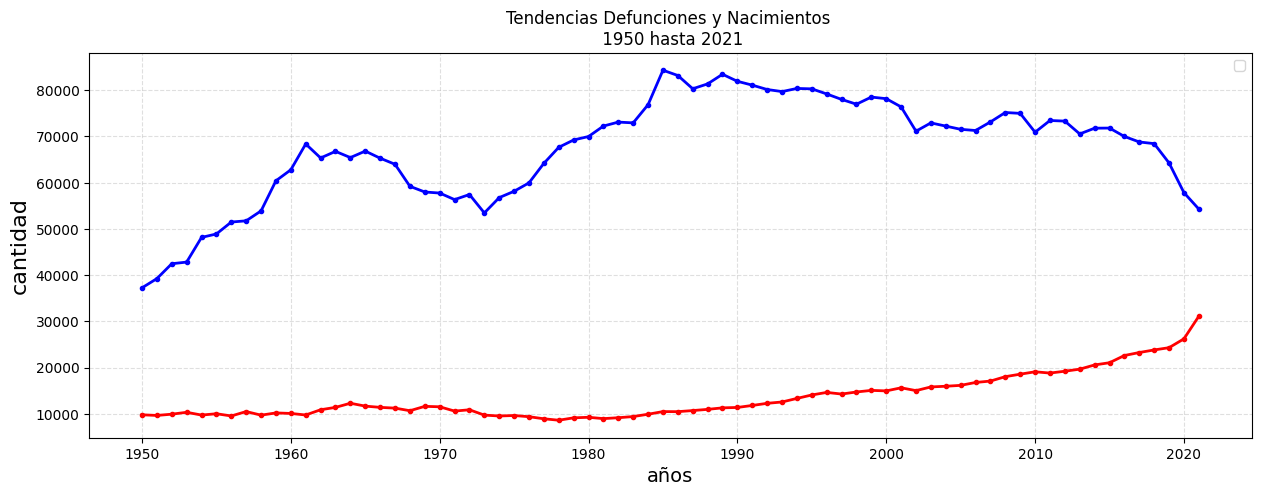

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize= (15,5))

#el eje Y va a ser Defunciones
#el eje X va a ser años
#Dos Colecciones en el grafico
#identifica   X             Y
plt.plot(df['Año'],df['Defunciones'],marker='o',markersize="3",lw=2, color='red')
plt.plot(df['Año'],df['Nacimientos'],marker='o',markersize="3",lw=2, color='blue')

plt.grid(linestyle='--', alpha=0.4)
plt.xlabel('años',fontsize=14)
plt.ylabel('cantidad',fontsize=16)
plt.title(f'Tendencias Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}')
plt.legend()
plt.show

Text(0.5, 1.0, 'Tendencias Defunciones y Nacimientos\n1950 hasta 2021')

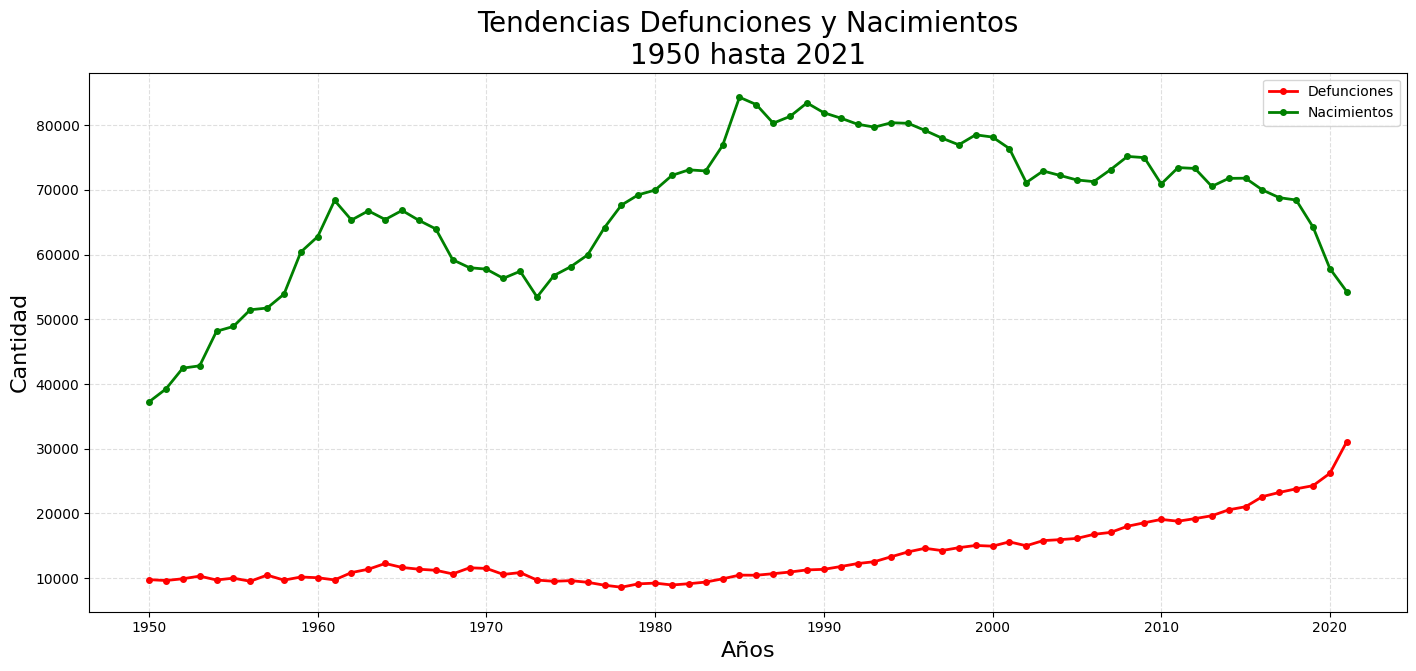

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,7))

#El eje Y Defunciones 
#Eje X Años
#Dos Coleccione en el gráfico
#Idenfica     x             y
plt.plot(df['Año'],df['Defunciones'],marker='o',markersize="4",lw=2, color='red',label='Defunciones')
plt.plot(df['Año'],df['Nacimientos'],marker='o',markersize="4",lw=2, color='green',label='Nacimientos')

#Agrego el cuadriculado del fondo
plt.grid(linestyle='--', alpha=0.4)

#Dibujo la etiqueta Label de el plot
plt.legend()

plt.xlabel('Años',fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.title(f'Tendencias Defunciones y Nacimientos\n{df['Año'].min()} hasta {df['Año'].max()}',fontsize=20)

### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [8]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año', 'Nacimientos']
df[filtro]

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [9]:
# Filtrar datos desde el año 2010
#df_filtrado = df[df['Año']>=2010]
df_filtrado = df.loc[df['Año'] >= 2010] 
df_filtrado

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [10]:
# total_nacimientos
total_n = df['Nacimientos'].sum()
# total_defunciones 
total_d = df['Defunciones'].sum()

print(f'total nacimientos: {total_n}, total defunciones: {total_d}')

total nacimientos: 4846207, total defunciones: 975501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [11]:
#Saldo Poblacional
df['saldo_pobla'] = df['Nacimientos'] - df["Defunciones"]
df

,Año,Nacimientos,Defunciones,saldo_pobla
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444
...,...,...,...,...
67,2017,68811,23246,45565
68,2018,68449,23806,44643
69,2019,64274,24292,39982
70,2020,57848,26205,31643


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

In [12]:
import matplotlib.pyplot as plt


anio_inicial = int(input('Ingrese el año inicial: '))
anio_final = int(input('Ingrese el año Final: '))


#df >= anio_inicial and <= anio_final

                                              #and
df_rango_anios = df[((df['Año']>= anio_inicial) & (df['Año'] <= anio_final))]


df_rango_anios

,Año,Nacimientos,Defunciones,saldo_pobla
0,1950,37248,9769,27479


## Filtrar un año para grafico ##

<function matplotlib.pyplot.show(close=None, block=None)>

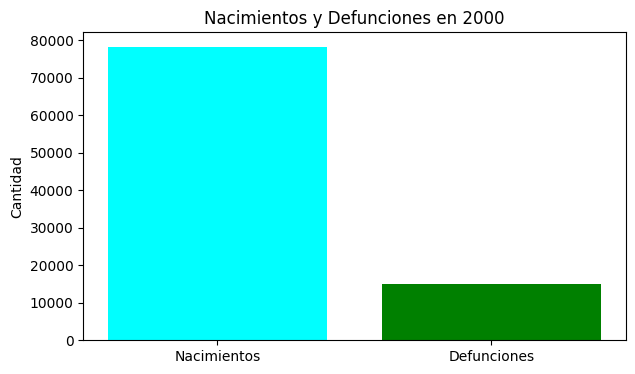

In [13]:
import matplotlib.pyplot as plt


anio_filtrar = int(input('Ingrese el año a Graficar: '))


#df >= anio_inicial and <= anio_final
# and
df_rango_anios = df[df['Año'] == anio_filtrar ]

#values regresa el valor de la columna el numero del registro.
plt.figure(figsize=(7,4))
plt.bar(['Nacimientos','Defunciones'], [df_rango_anios['Nacimientos'].values[0],
df_rango_anios['Defunciones'].values[0]],color=['Cyan','Green'])


plt.title(f"Nacimientos y Defunciones en {df_rango_anios['Año'].values[0]}")
plt.ylabel('Cantidad')
plt.show

### **Gráfico de barras: Comparación de nacimientos y defunciones**

<function matplotlib.pyplot.show(close=None, block=None)>

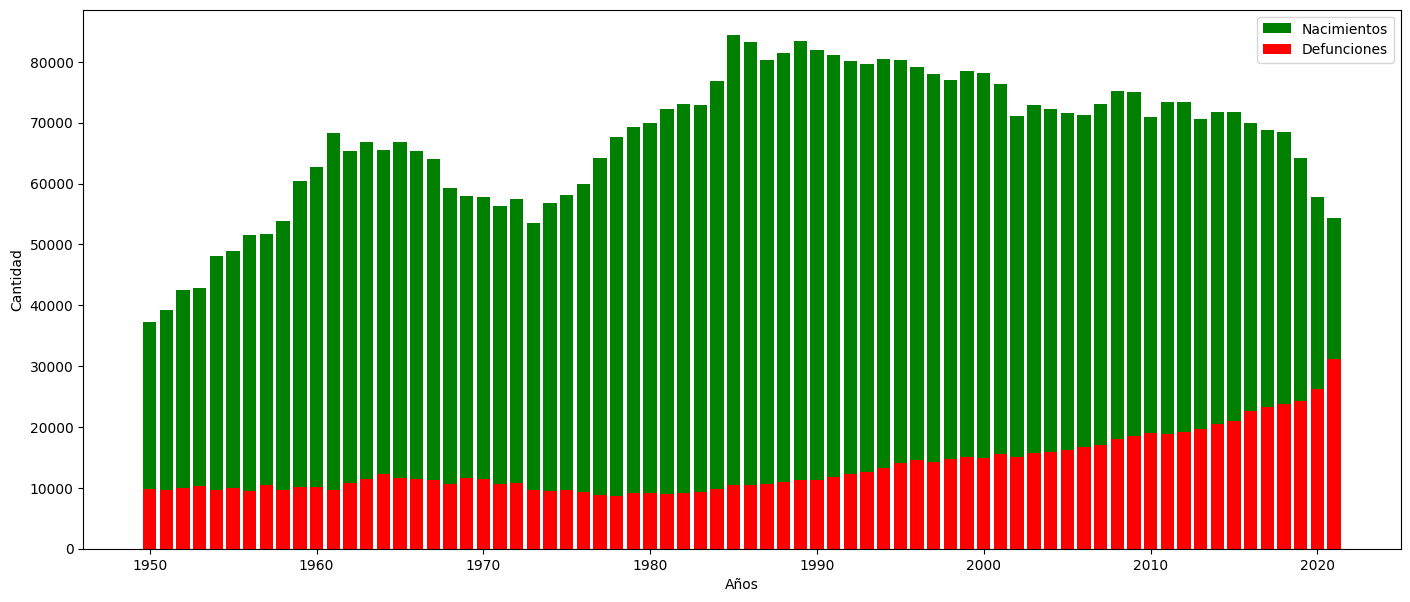

In [14]:
# Crear gráfico de barras

import matplotlib.pyplot as plt

plt.figure(figsize=(17,7),label='Nacimientos')
plt.bar(df['Año'],df['Nacimientos'],label='Nacimientos',color=['Green'])
plt.bar(df['Año'],df['Defunciones'],label='Defunciones',color=['Red'])

plt.xlabel('Años')
plt.ylabel('Cantidad')
plt.legend()
plt.show


In [15]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]
ultimo_anio
# Crear gráfico de barras


,Año,Nacimientos,Defunciones,saldo_pobla
71,2021,54288,31093,23195


### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [ ]:
#Filtrado

df_filtrado = df[df['Año'] >=2000]
df_filtrado.head()

,Año,Nacimientos,Defunciones,saldo_pobla
50,2000,78178,14944,63234
51,2001,76401,15609,60792
52,2002,71144,15004,56140
53,2003,72938,15800,57138
54,2004,72247,15949,56298


2. **Calcular promedios:**

In [ ]:
#promedios fallecidos y nacimientos

df_filtrado = df[df['Año'] >= 2020]
promedio_nacimientos = df_filtrado['Nacimientos'].mean()
promedio_defunciones = df_filtrado['Defunciones'].mean()


print(f'El promedio de nacimientos a partir del 2010 es de {promedio_nacimientos:.2f}')
print(f'El promedio de defunciones a partir del 2010 es de {promedio_defunciones:.2f}')

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (937863608.py, line 3)

3. **Graficar:**

C:\Users\Nibelungen\AppData\Local\Temp\ipykernel_12152\4099419784.py:11: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.pie(data,[0,0], mr_x, color, autopct='%1.1f%%', startangle=90)


<function matplotlib.pyplot.show(close=None, block=None)>

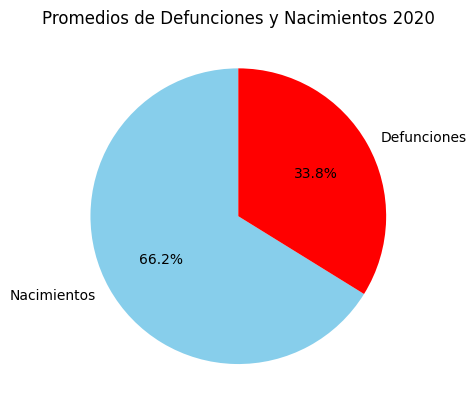

In [34]:
#graficar en tipo pie

df_filtrado = df[df['Año'] >= 2020]
promedio_nacimientos = df_filtrado['Nacimientos'].mean()
promedio_defunciones = df_filtrado['Defunciones'].mean()

mr_x = ['Nacimientos', 'Defunciones'] #etiquetas
data = [promedio_nacimientos,promedio_defunciones]
color = ['skyblue', 'red']

plt.pie(data,[0,0], mr_x, color, autopct='%1.1f%%', startangle=90)
plt.title('Promedios de Defunciones y Nacimientos 2020')
plt.show
